# Image Processing Using Numpy: With Practical Implementation And Code

### Introduction
Hello Readers!!
NumPy also called Numerical Python is an amazing library open-source Python library for data manipulation and scientific computing. It is used in the domain of linear algebra, Fourier transforms, matrices, and the data science field. which is used. NumPy arrays are way faster than Python Lists. You must have known about Image processing Libraries such as OpenCV, Python Image Library(PIL), Scikit-Image, and many more. 

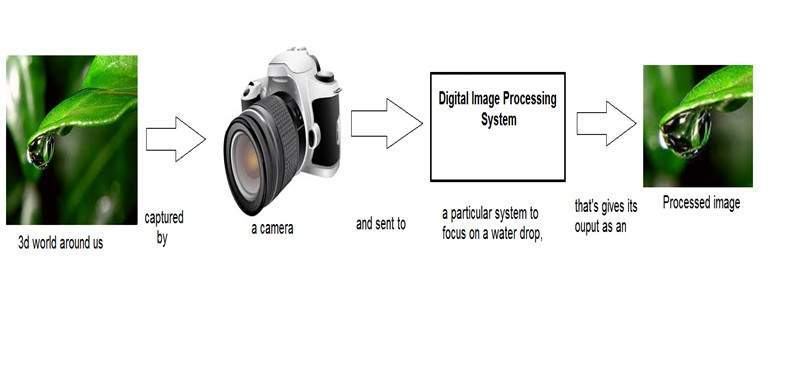

You must be wondering that NumPy is also used for Image Processing. The fundamental idea is that we know images are made up of NumPy ndarrays. So we can manipulate these arrays and play with images

### Table Of Contents
--> Installation of Required Libraries

--> Importing the Required Libraries

--> Opening an Image

--> Details of an image

--> Saving ndarray as Image

--> Rotating an Image

--> Negative of an Image

--> Padding Black Spaces

--> Visualizing RGB Channels

--> Colour Reduction

--> Trim Image

--> Pasting With Slice

--> Binarize Image

--> Flip Image

--> An alternate way to Flip an Image

--> Blending Two Images

--> Masking Images

--> Histogram For Pixel Intensity

### Installation of Required Libraries
Type below commands in Anaconds Prompt and all the required will get installed.

In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


### Importing the Required Libraries
We are using numpy, matplotlib, and Python Imaging Library (PIL) libraries for our further analysis.

In [4]:
# importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

### Opening an Image
To open an image, we are using the open() method from the PIL Image module. Similarly, we can use the matplotlib library to read and show images. It uses an image module for working with images. It offers two useful methods imread() and imshow()

-->imread() – to read the images

-->imshow() – to display the images

In this analysis, we are using imshow() method to display the image.

### Check the below code for read and displaying an image



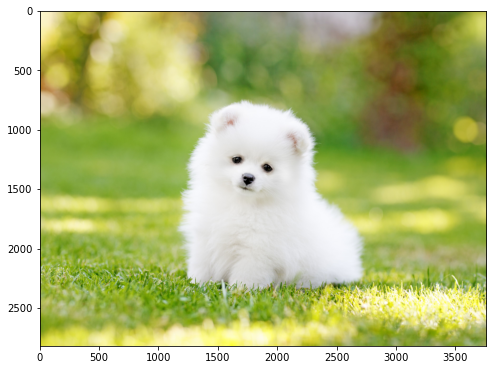

In [5]:
img = np.array(Image.open('Dog.jpg'))
plt.figure(figsize=(8,8))
plt.imshow(img)

### Details of an Image
In this section, we will see what is the dimension, shape, and data type of an image. To check the size of the image, we are using the Image.size property. Check the below code:

In [6]:
print('# of dims: ',img.ndim)     # dimension of an image
print('Img shape: ',img.shape)    # shape of an image
print('Dtype: ',img.dtype)
print(img[20, 20])                # pixel value at [R, G, B]
print(img[:, :, 2].min())         # min pixel value at channel B

# of dims:  3
Img shape:  (2820, 3760, 3)
Dtype:  uint8
[252 247 205]
0


### Saving ndarray as Image

To save a ndarray as an image, we are using the Imag.save() method.

In [7]:
path = 'cute_Dog.jpg'
pil_img = Image.fromarray(img)
pil_img.save(path) #Rotating an Image

We are rotating an image from scratch without using the PIL library. If you would like to rotate an image by using the PIL, then use Image.rotate() method.

### Algorithm: image(ndarray) -> transpose -> mirror image across y axis (middle column)
Check the below code to rotate an image by 90 degrees in a clockwise direction.

Text(0.5, 1.0, 'rotated')

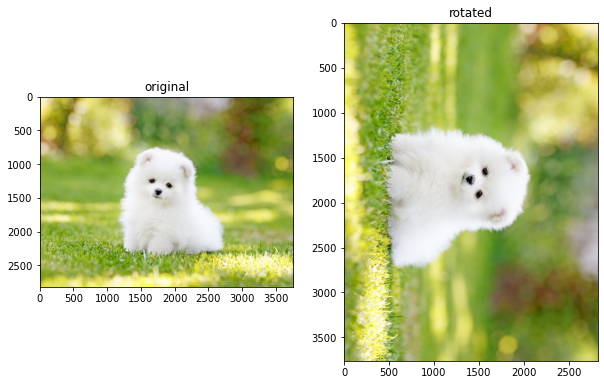

In [8]:
degrees = 90
img = np.array(Image.open('Dog.jpg'))
# img = img.sum(2) / (255*3) # converting to grayscale
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("original")
img0 = img.copy()
for _ in range(degrees // 90):
    img0 = img0.transpose(1, 0, 2)
    for j in range(0, img0.shape[1] // 2):
        c = img0[:, j, :].copy()
        img0[:, j, :] = img0[: , img0.shape[1]-j-1, :]
        img0[: , img0.shape[1]-j-1, :] = c
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title("rotated")

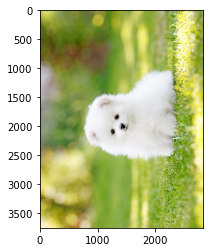

In [9]:
plt.imshow(np.rot90(img))

### Negative of an Image
Converting a color image to a negative image is very simple. You to perform only 3 steps for each pixel of the image

->>First, get the RGB values of the pixel

->>Calculate new RGB values using R = 255 – R, G = 255 – G, B = 255- B

->>Finally, save the new RGB values in the pixel

Check the below code to convert an image to a negative image.

Text(0.5, 1.0, 'Negative of RGB image')

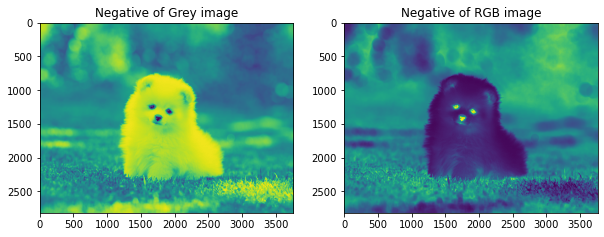

In [10]:
fig = plt.figure(figsize=(10, 10))
img_grey =  img.sum(2) / (255*3)     # 255 * 3 because we added along channel axis previously
fig.add_subplot(1, 2, 1)
plt.imshow(img_grey)
plt.title('Negative of Grey image')
img_N = 255 - img_grey
fig.add_subplot(1, 2, 2)
plt.imshow(img_N)
plt.title('Negative of RGB image')

### Padding Black Spaces
To add black padding around an image, use the below code:

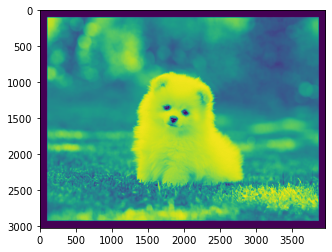

In [11]:
img = np.array(Image.open('Dog.jpg'))
img_grey = img.sum(2) / (255*3)
img0 = img_grey.copy()
img0 = np.pad(img0, ((100,100),(100,100)), mode='constant')
plt.imshow(img0)

### Visualizing RGB Channels
To split the image into each RGB colors, you can use the below code:

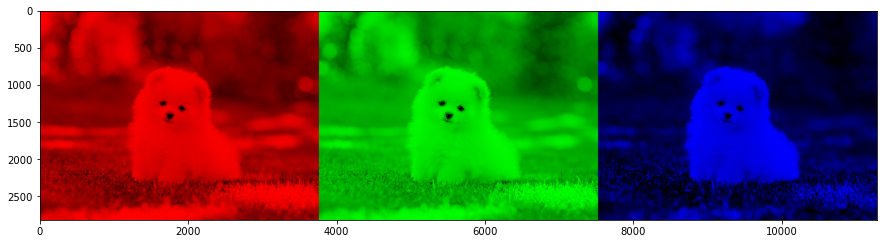

In [12]:
img = np.array(Image.open('Dog.jpg'))
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

### Colour Reduction
We can reduce the color intensity depends on our needs. Check the below code for color reduction.

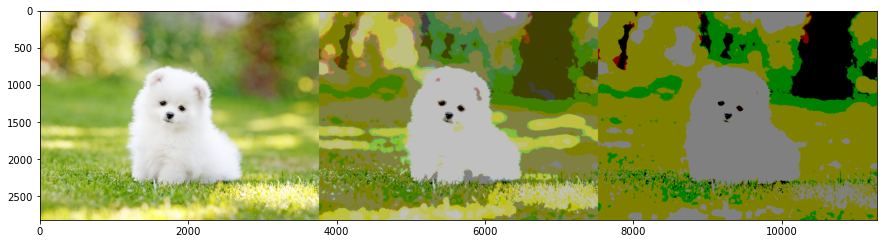

In [13]:
img = np.array(Image.open('Dog.jpg'))
# Making Pixel values discrete by first division by // which gives int and then multiply by the same factor
img_0 = (img // 64) * 64
img_1 = (img // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_all)

### Trim Image
We can trim an image in Numpy using Array Slicing. Check the below code for trimming an image using python.

Text(0.5, 1.0, 'Trimmed')

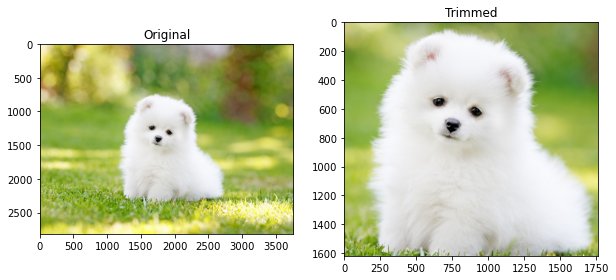

In [14]:
img = np.array(Image.open('Dog.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
img0 = img[700:-500, 1000:-1000, :] # Trimming is done by adjusting the slicing of array
fig.add_subplot(1, 2, 2)
plt.imshow(img0)
plt.title('Trimmed')

### Pasting With Slice
We can paste a slice of an image onto another image. Check the below code in Python for pasting a slice of the image.

Text(0.5, 1.0, 'Pasted with slice')

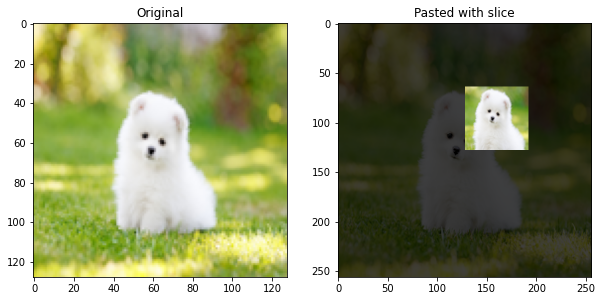

In [15]:
src = np.array(Image.open('Dog.jpg').resize((128, 128)))
dst = np.array(Image.open('Dog.jpg').resize((256, 256))) // 4
dst_copy = dst.copy()
dst_copy[64:128, 128:192] = src[32:96, 32:96]
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(src)
plt.title('Original')
fig.add_subplot(1, 2, 2)
plt.imshow(dst_copy)
plt.title('Pasted with slice')

### Binarize Image
We can also binarize an Image using Numpy. Check the below code to binarize an image.

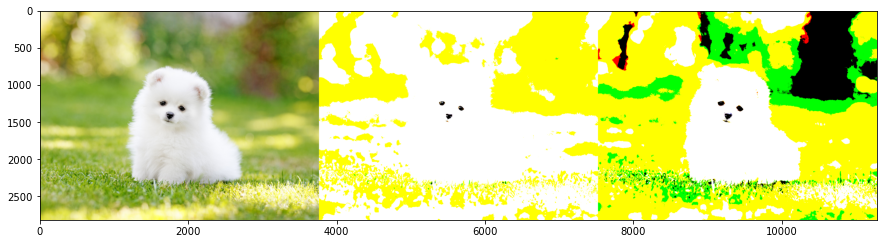

In [16]:
img = np.array(Image.open('Dog.jpg'))
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

### Flip Image
Check the below code for flipping an image.

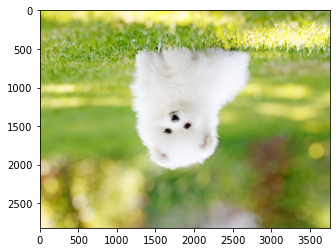

In [17]:
img0 = img.copy()
for i in range(img0.shape[0] // 2):
    c = img0[i, :, :].copy()
    img0[i, :, :] = img0[img0.shape[0] - i - 1, :, :]
    img0[img0.shape[0] - i - 1, :, :] = c
plt.imshow(img0)

### An Alternate way to Flip an Image
->>np.flipud() : [up/down]flips over x-axis

->>np.fliplr() : [left/right]flips over y_axis

Check the below code for Flipping an Image:

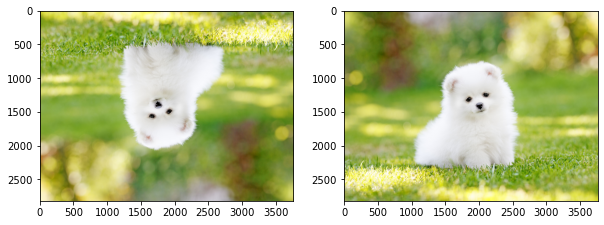

In [18]:
img = np.array(Image.open('Dog.jpg'))
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(np.flipud(img))
fig.add_subplot(1, 2, 2)
plt.imshow(np.fliplr(img))

### Blending Two Images
If you want to blend two images, then you can do that too. Check the below code

uint8


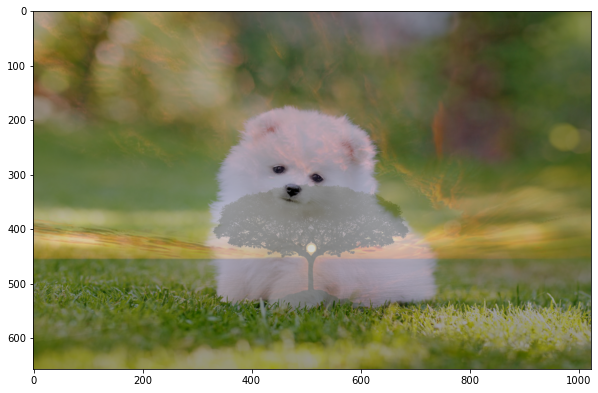

In [25]:
img = np.array(Image.open('Tree.jpg'))
img0 = np.array(Image.open('Dog.jpg').resize(img.shape[1::-1])) # resize takes 2 arguments (WIDTH, HEIGHT)
print(img.dtype)
# uint8
dst = (img * 0.3 + img0 * 0.6).astype(np.uint8)   # Blending them in
plt.figure(figsize=(10, 10))
plt.imshow(dst)

### Masking Images
Check the below code for masking an image.

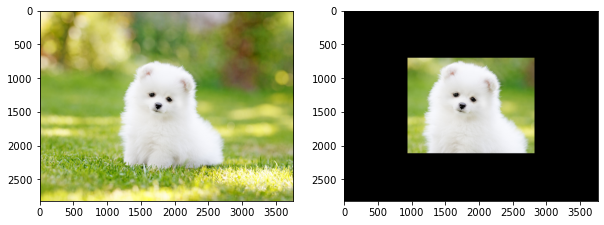

In [26]:
img = np.array(Image.open('Dog.jpg'))
ones = np.ones((img.shape[0] // 2, img.shape[1] // 2, 3))
zeros = np.zeros(((img.shape[0] // 4, img.shape[1] // 4, 3)))
zeros_mid = np.zeros(((img.shape[0] // 2, img.shape[1] // 4, 3)))
up = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
middle = np.concatenate((zeros_mid, ones, zeros_mid), axis=1)
down = np.concatenate((zeros, zeros, zeros, zeros), axis=1)
mask = np.concatenate((up, middle, down), axis=0)
mask = mask / 255
img0 = mask * img
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(img0)

### Histogram For Pixel Intensity
Let’s draw the histogram using a matplotlib hist() function. Check the below code to draw the Pixel Intensity Histogram

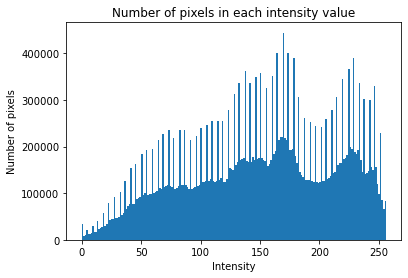

In [27]:
img = np.array(Image.open('Dog.jpg'))
img_flat = img.flatten()
plt.hist(img_flat, bins=200, range=[0, 256])
plt.title("Number of pixels in each intensity value")
plt.xlabel("Intensity")
plt.ylabel("Number of pixels")
plt.show()